In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import textwrap

In [3]:
df = pd.read_csv('cleaned_df.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Country,Item,Year,production_in_t,area_in_h,yield_in_kg_per_h,country_encoded,Item_encoded,Category
0,Afghanistan,"Almonds, in shell",2020,39307.0,22134.0,1776.0,0,2,Nuts
1,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",2019,17808.0,25293.0,704.0,0,3,Spices
2,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",2020,17966.0,25558.0,703.0,0,3,Spices
3,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",2021,17876.0,25357.0,705.0,0,3,Spices
4,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",2022,17883.0,25403.0,704.0,0,3,Spices
...,...,...,...,...,...,...,...,...,...
31001,Zimbabwe,Watermelons,2019,92975.0,3719.0,25000.0,198,152,Fruits
31002,Zimbabwe,Watermelons,2021,139000.0,4430.0,31377.0,198,152,Fruits
31003,Zimbabwe,Watermelons,2022,162100.0,4790.0,33841.0,198,152,Fruits
31004,Zimbabwe,Watermelons,2023,150600.0,4610.0,32668.0,198,152,Fruits


In [4]:
df['Year'] = df['Year'].round()
df['Year']= df['Year'].astype(int)

In [5]:
area_trend = df.groupby(['Year','Category'])['area_in_h'].median().reset_index(name='count')
yield_trend = df.groupby(['Year','Category'])['yield_in_kg_per_h'].median().reset_index(name='count')
production_trend = df.groupby(['Year','Category'])['production_in_t'].median().reset_index(name='count')

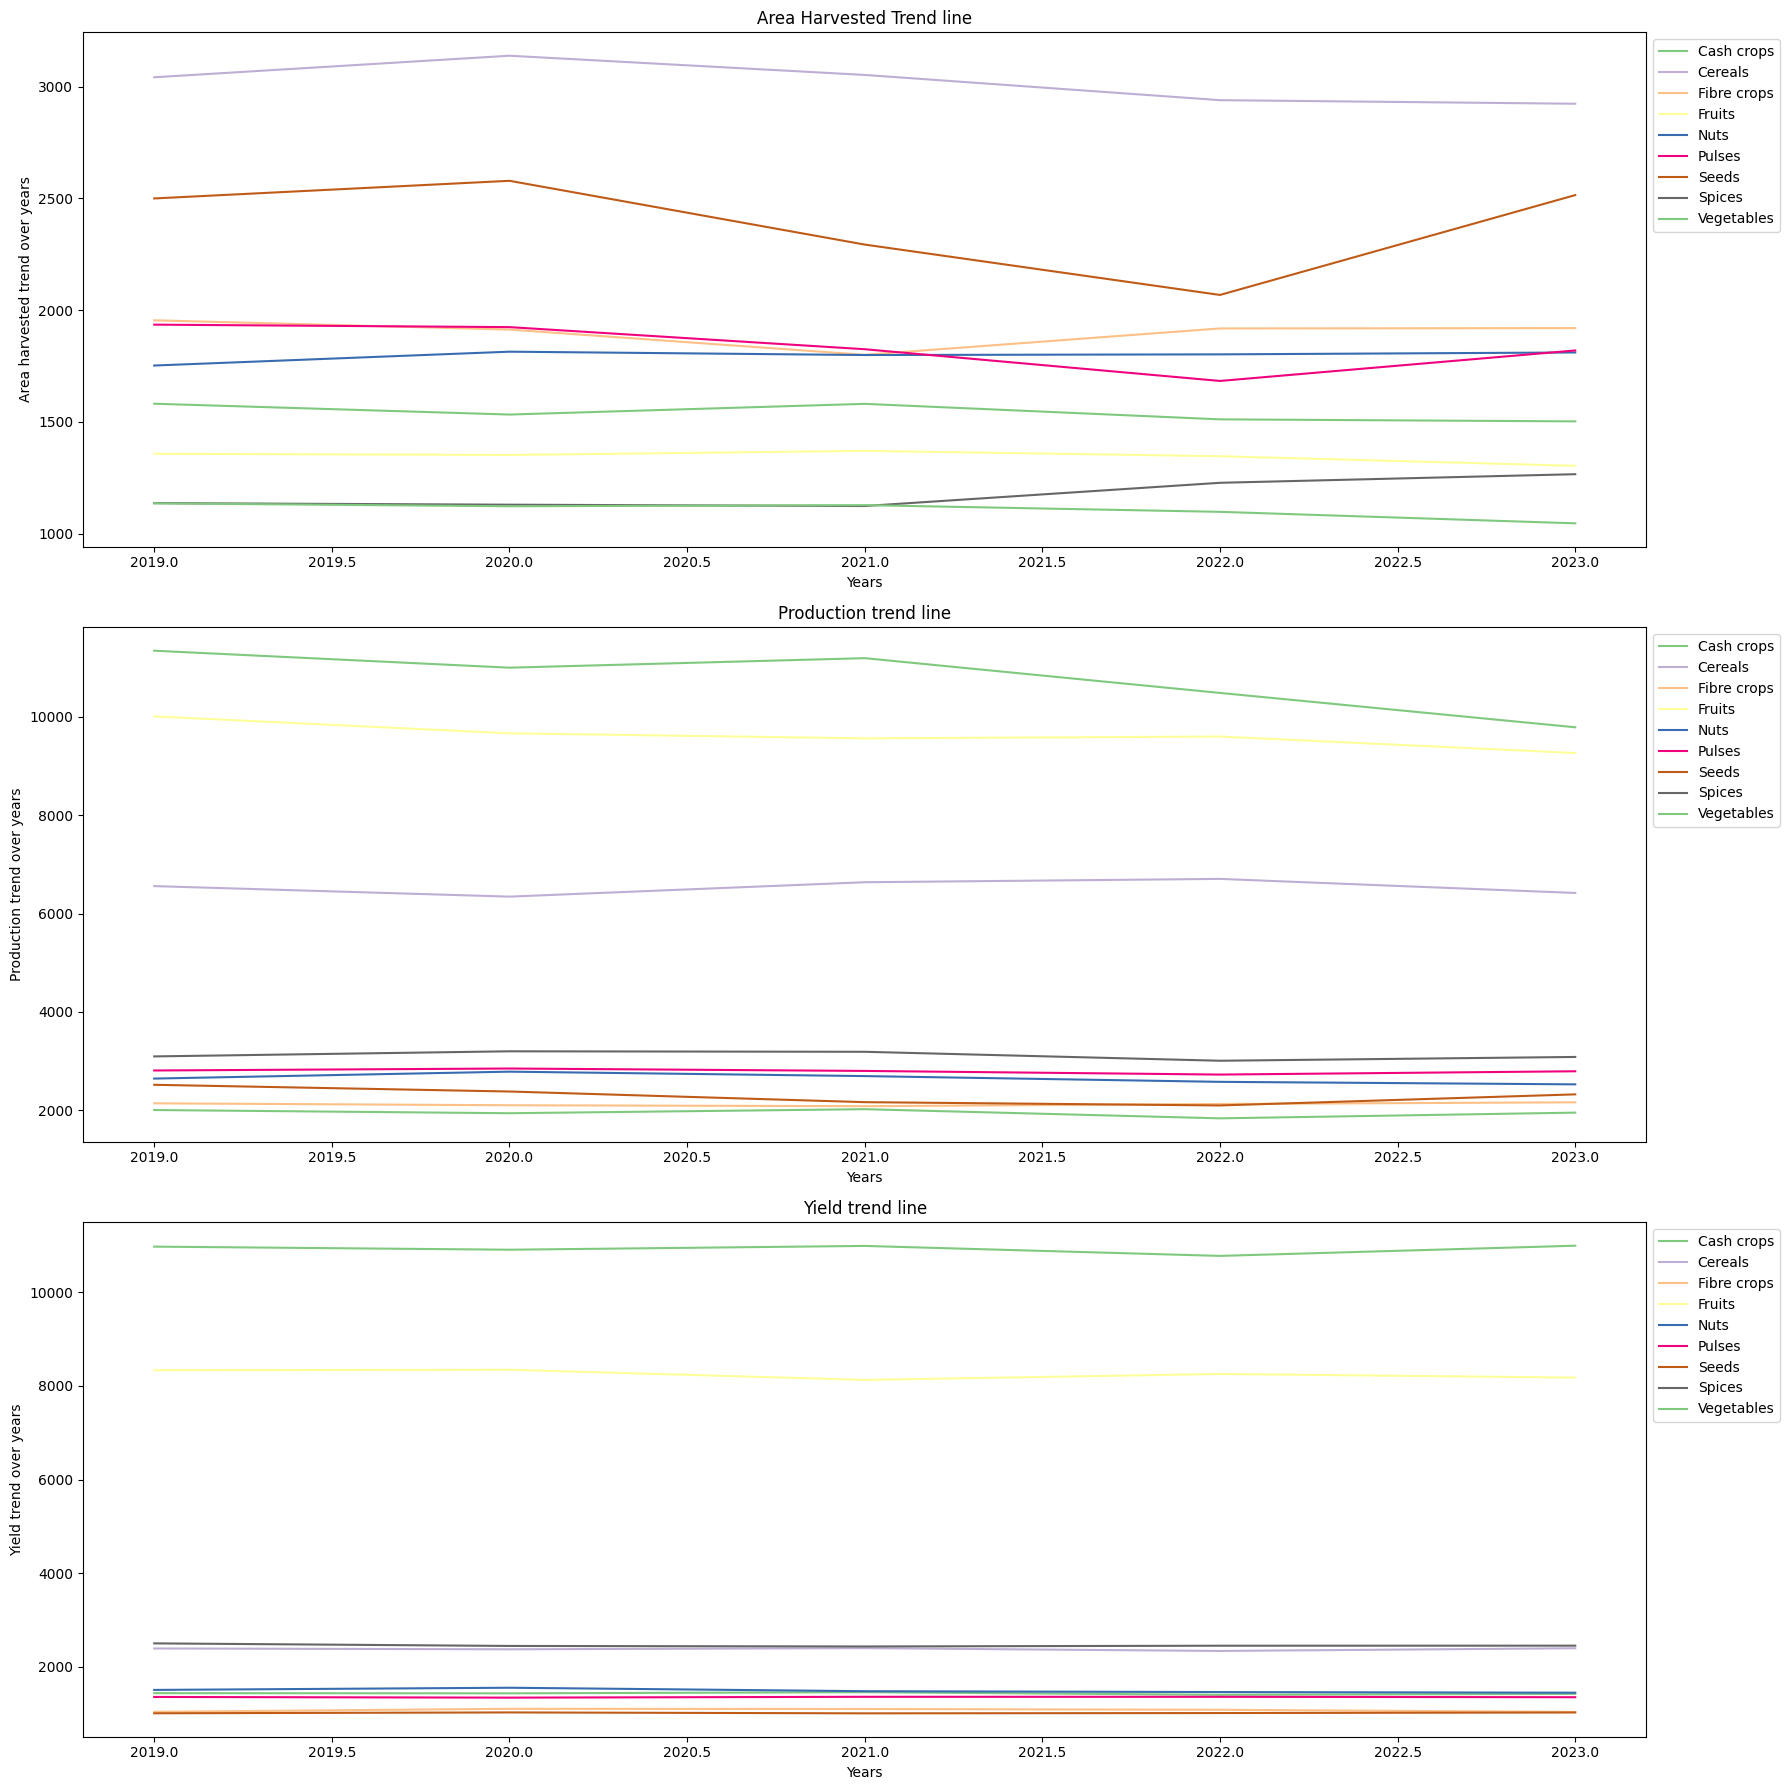

In [49]:
fig, axes = plt.subplots(3,1, figsize=(18, 18))
sns.lineplot(data=area_trend,x = 'Year',y = 'count',hue = 'Category',palette = 'Accent',ax=axes[0])
axes[0].set_title('Area Harvested Trend line')
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Area harvested trend over years')
axes[0].legend(bbox_to_anchor=(1, 1))

sns.lineplot(data=production_trend,x = 'Year',y = 'count',hue = 'Category',palette = 'Accent',ax = axes[1])
axes[1].set_title('Production trend line')
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Production trend over years')
axes[1].legend(bbox_to_anchor=(1, 1))

sns.lineplot(data=yield_trend,x = 'Year',y = 'count',hue = 'Category',palette = 'Accent',ax = axes[2])
axes[2].set_title('Yield trend line')
axes[2].set_xlabel('Years')
axes[2].set_ylabel('Yield trend over years')
axes[2].legend(bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [50]:
country_area = df.groupby(['Country','Year','Category'])['area_in_h'].sum().reset_index(name='Total Area')
country_area

,Country,Year,Category,Total Area
0,Afghanistan,2019,Cash crops,1653.0
1,Afghanistan,2019,Cereals,1401.0
2,Afghanistan,2019,Fruits,63496.0
3,Afghanistan,2019,Nuts,9253.0
4,Afghanistan,2019,Seeds,2672.0
...,...,...,...,...
6604,Zimbabwe,2023,Nuts,9882.0
6605,Zimbabwe,2023,Pulses,5945.0
6606,Zimbabwe,2023,Seeds,22599.0
6607,Zimbabwe,2023,Spices,6670.0


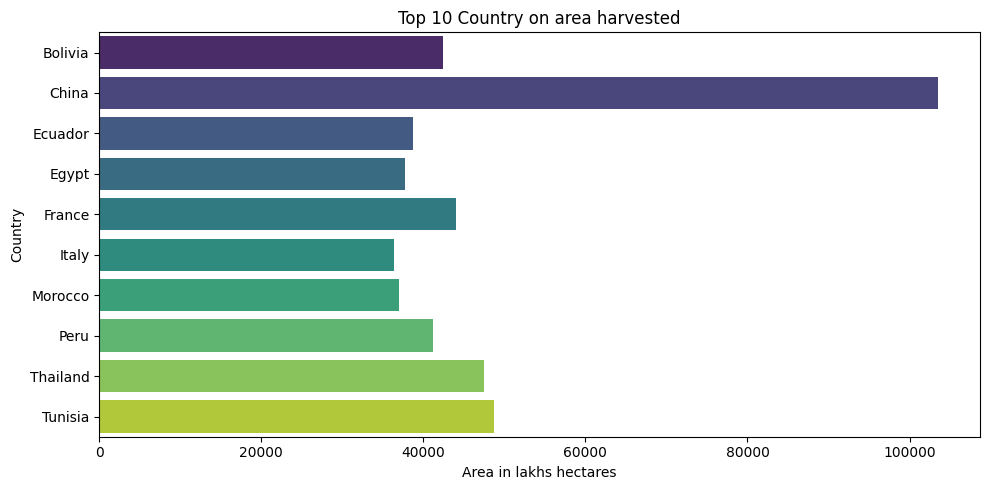

In [51]:
country_area = df.groupby(['Country','Year','Category'])['area_in_h'].sum().reset_index(name='Total Area')
top_countries = df.groupby('Country')['area_in_h'].sum().nlargest(10).index
country_trend = country_area[country_area['Country'].isin(top_countries)]

plt.figure(figsize=(10,5))

sns.barplot(
    data = country_trend,
    x = 'Total Area',
    y = 'Country',
    palette ='viridis',
    errorbar = None 
)
plt.title('Top 10 Country on area harvested')
plt.xlabel('Area in lakhs hectares')
plt.tight_layout()
plt.show()

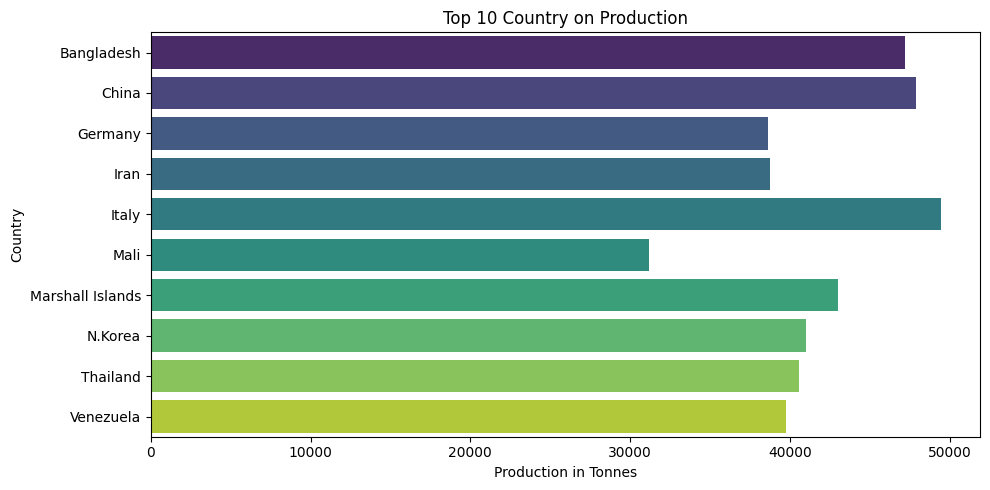

In [11]:
country_production = df.groupby(['Country','Year','Category'])['production_in_t'].median().reset_index(name='Total Tonnes')
top_countries = df.groupby('Country')['production_in_t'].median().nlargest(10).index
country_trend = country_production[country_production['Country'].isin(top_countries)]

plt.figure(figsize=(10,5))

sns.barplot(
    data = country_trend,
    x = 'Total Tonnes',
    y = 'Country',
    palette ='viridis',
    errorbar = None 
)
plt.title('Top 10 Country on Production')
plt.xlabel('Production in Tonnes')
plt.tight_layout()
plt.show()

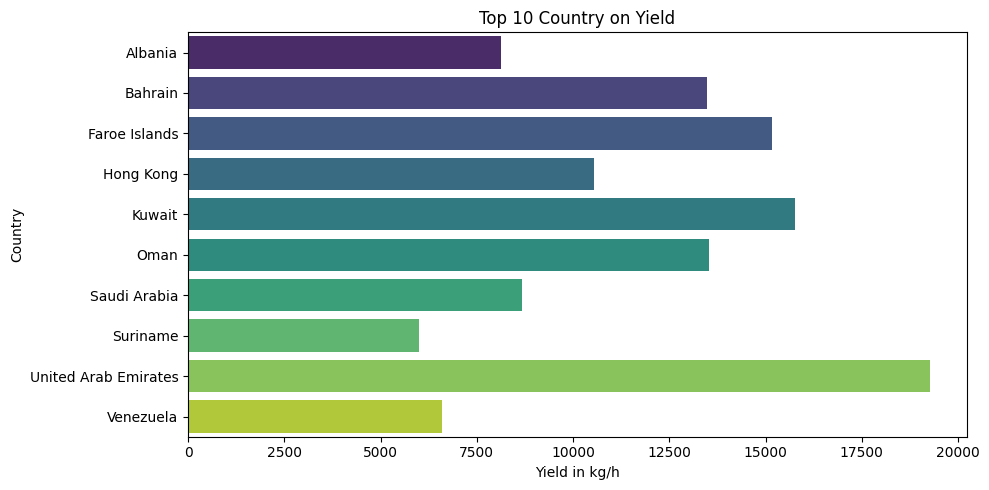

In [12]:
country_yield = df.groupby(['Country','Year','Category'])['yield_in_kg_per_h'].median().reset_index(name='Total Yield')
top_countries = df.groupby('Country')['yield_in_kg_per_h'].median().nlargest(10).index
country_trend = country_yield[country_yield['Country'].isin(top_countries)]

plt.figure(figsize=(10,5))

sns.barplot(
    data = country_trend,
    x = 'Total Yield',
    y = 'Country',
    palette ='viridis',
    errorbar = None 
)
plt.title('Top 10 Country on Yield')
plt.xlabel('Yield in kg/h')
plt.tight_layout()
plt.show()

In [13]:
item_counts = df.groupby(['Country','Year','Item'])['production_in_t'].median().reset_index(name='Total Production')
item_counts

,Country,Year,Item,Total Production
0,Afghanistan,2019,"Anise, badian, coriander, cumin, caraway, fenn...",17808.0
1,Afghanistan,2019,Apricots,129363.0
2,Afghanistan,2019,Figs,24319.0
3,Afghanistan,2019,Millet,2714.0
4,Afghanistan,2019,Mustard seed,1700.0
...,...,...,...,...
30590,Zimbabwe,2023,"Tangerines, mandarins, clementines",13467.0
30591,Zimbabwe,2023,Tea leaves,66219.0
30592,Zimbabwe,2023,Tomatoes,459036.0
30593,Zimbabwe,2023,"Vanilla, raw",10.0


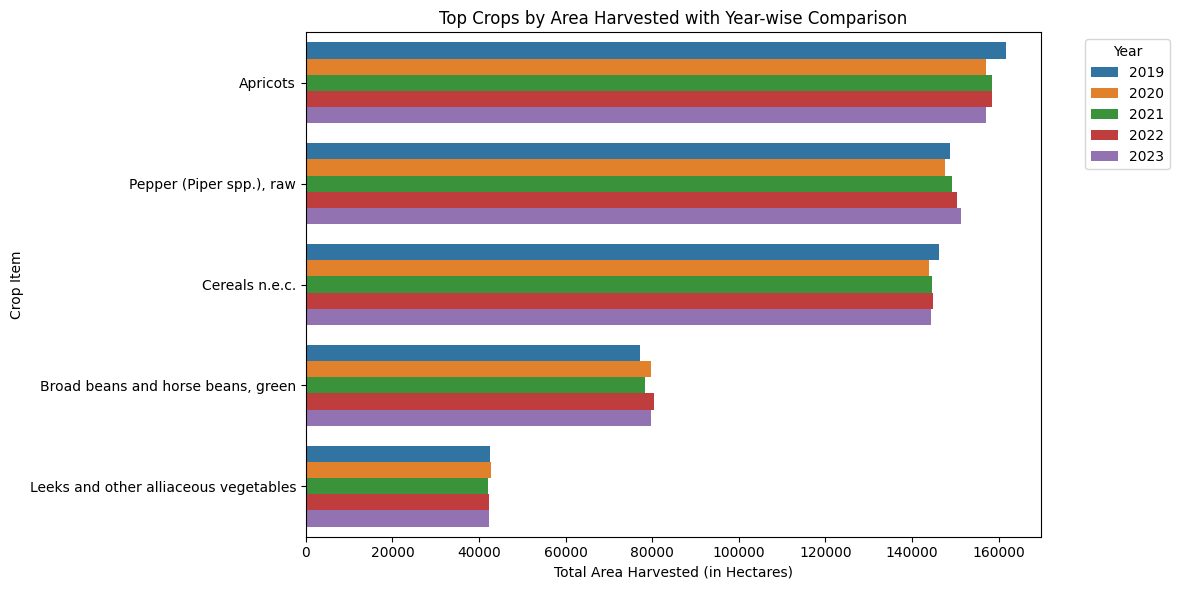

In [28]:
item_area = df.groupby(['Country','Year','Item'])['area_in_h'].sum().reset_index(name='Total Area')
item_area_top = item_area.nlargest(25,'Total Area')

plt.figure(figsize=(12, 6))

# Barplot with Year as hue
sns.barplot(
    data=item_area_top,
    x='Total Area',
    y='Item',
    hue='Year',
    palette='tab10',
    errorbar = None
)

plt.title('Top Crops by Area Harvested with Year-wise Comparison')
plt.xlabel('Total Area Harvested (in Hectares)')
plt.ylabel('Crop Item')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

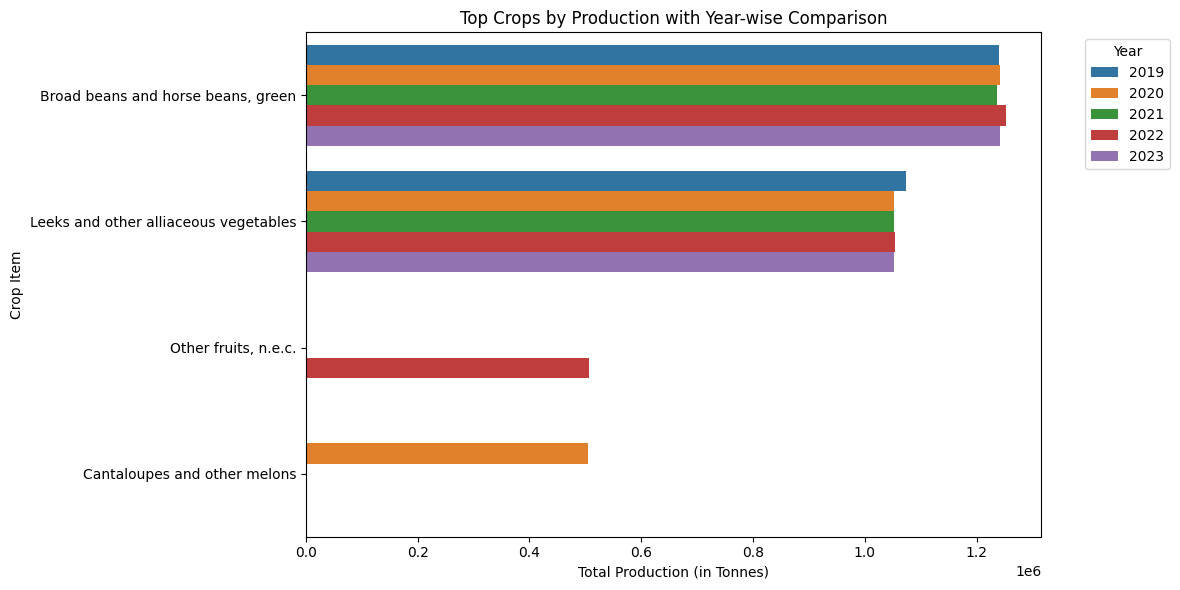

In [46]:
item_production = df.groupby(['Country','Year','Item'])['production_in_t'].sum().reset_index(name='Total Production')
item_production_top = item_production.nlargest(12,'Total Production')

plt.figure(figsize=(12, 6))

# Barplot with Year as hue
sns.barplot(
    data=item_production_top,
    x='Total Production',
    y='Item',
    hue='Year',
    palette='tab10',
    errorbar = None
)

plt.title('Top Crops by Production with Year-wise Comparison')
plt.xlabel('Total Production (in Tonnes)')
plt.ylabel('Crop Item')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [37]:
item_yield = df.groupby(['Country','Year','Item'])['yield_in_kg_per_h'].sum().reset_index(name='Total Yield')
item_yield_top = item_yield.nlargest(15,'Total Yield')

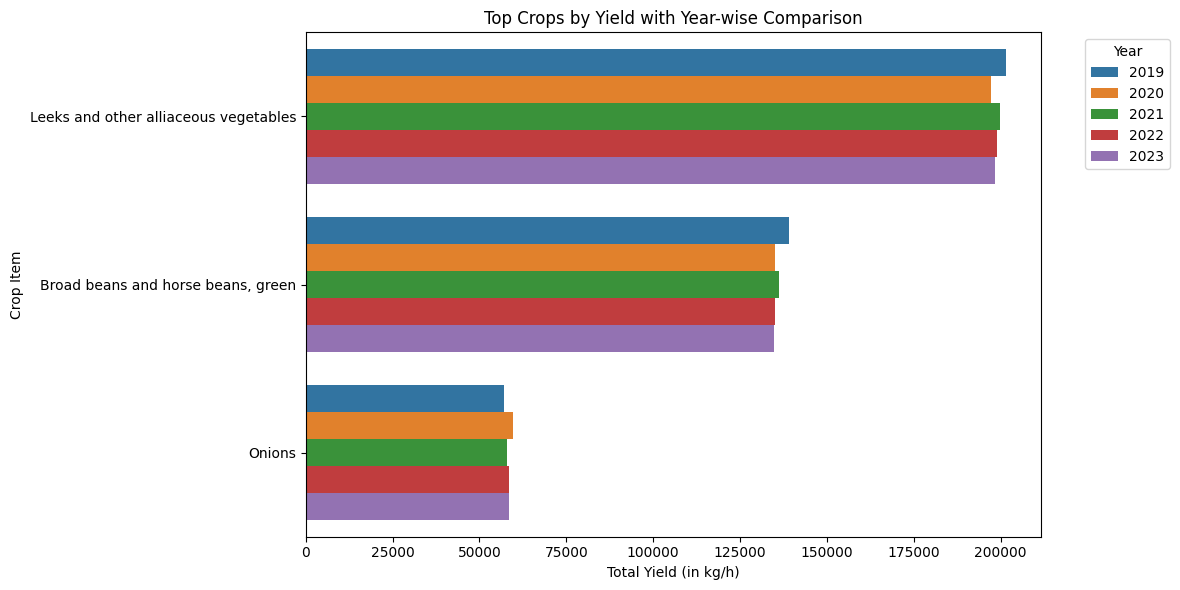

In [39]:
plt.figure(figsize=(12, 6))

# Barplot with Year as hue
sns.barplot(
    data=item_yield_top,
    x='Total Yield',
    y='Item',
    hue='Year',
    palette='tab10',
    errorbar = None
)

plt.title('Top Crops by Yield with Year-wise Comparison')
plt.xlabel('Total Yield (in kg/h)')
plt.ylabel('Crop Item')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

ax = plt.gca()
y_labels = [label.get_text() for label in ax.get_yticklabels()]

updated_labels = [
    'Chillies and Peppers (Green)' if label == 'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)' else label
    for label in y_labels
]
ax.set_yticklabels(updated_labels)
plt.tight_layout()
plt.show()

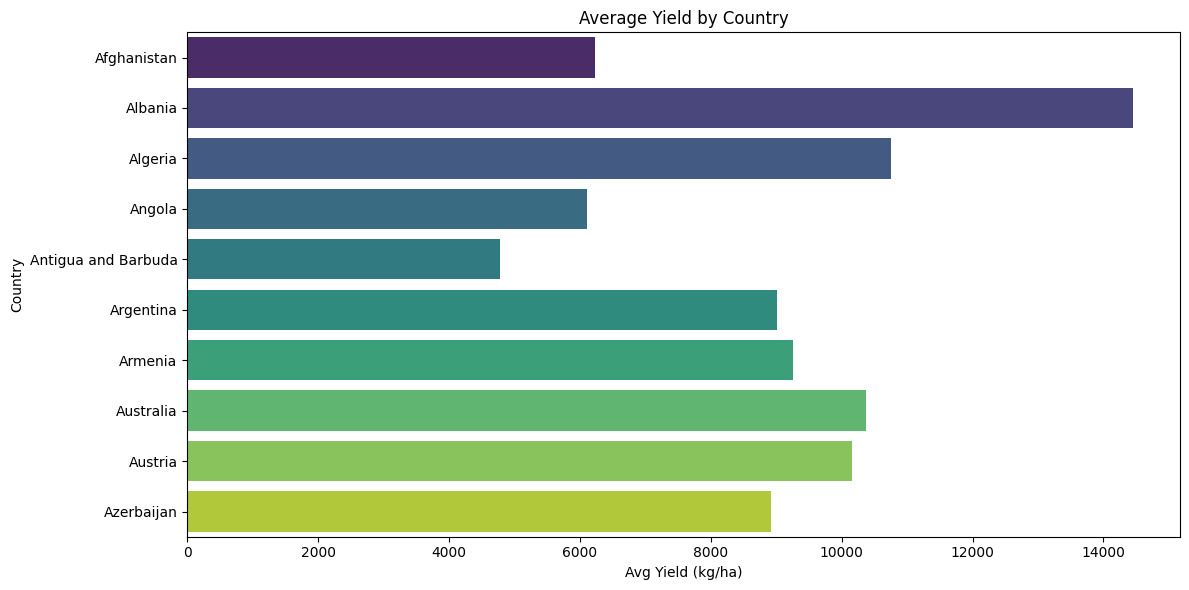

In [48]:
country_avg = df.groupby('Country').agg(
    avg_yield=('yield_in_kg_per_h', 'mean'),
    total_area=('area_in_h', 'sum')
).reset_index()

# Step 2: Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=country_avg.head(10), x='avg_yield', y='Country', palette='viridis')

plt.title('Average Yield by Country')
plt.xlabel('Avg Yield (kg/ha)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()